## All you need is love… And a pet!

<img src="./img/dataset-cover.jpg" width="920">

Crearemos un clasificador para predecir si un animal de un refugio sera adoptado o no (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). Los features son los siguientes:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Carga el dataset y convierte los valores categoricos a un formato correcto de representacion numerica (use dummy-variable encoding). 

- Divide el dataset en training set (80)% y test set (20%). Cada vector de X tiene que ir correspondiente al label Y, en este caso es si el outcome_type es adoptado o no 

- Usa scaling (standardize) los valores de cada feature para que tengan 0 mean y varianza 1



In [2]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
features = ['animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake' , 'sex_upon_outcome']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

In [3]:
data = original_data.drop(columns=['outcome_type'])

In [4]:
# Convert categorical variable into dummy/indicator variables
X = pd.get_dummies(data)
X

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,10.000000,10.000000,2017,1.0,0.588194,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,7.000000,7.000000,2014,2.0,1.259722,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,6.000000,6.000000,2014,3.0,1.113889,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10.000000,10.000000,2014,1.0,4.970139,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,16.000000,16.000000,2013,1.0,0.119444,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79667,0.038356,0.038356,2018,1.0,0.077083,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
79668,2.000000,2.000000,2018,1.0,0.053472,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
79669,1.000000,1.000000,2018,1.0,0.047917,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
79670,0.821918,0.410959,2018,1.0,1.762500,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [5]:
# Get labels
y = original_data['outcome_type']
y = pd.get_dummies(y)['Adoption']
y

0        0
1        0
2        0
3        0
4        0
        ..
79667    0
79668    0
79669    0
79670    0
79671    0
Name: Adoption, Length: 79672, dtype: uint8

In [6]:
# Split data in training and testing sets (80% train - 20%test)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print("Ejemplos usados para entrenar: ", len(x_train))
print("Ejemplos usados para test: ", len(x_test))

Ejemplos usados para entrenar:  63737
Ejemplos usados para test:  15935


In [7]:
x_test

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
55428,5.000000,5.000000,2016,1.0,5.104861,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
20961,0.328767,0.328767,2014,2.0,8.102778,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
27545,0.821918,0.821918,2015,1.0,1.084722,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
40336,1.000000,1.000000,2016,2.0,2.235417,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
53231,1.000000,1.000000,2016,1.0,5.024306,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49205,0.164384,0.164384,2016,1.0,14.841667,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
60211,5.000000,5.000000,2016,1.0,1.000000,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
24922,3.000000,2.000000,2014,1.0,431.160417,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
6425,2.000000,2.000000,2013,1.0,5.244444,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler
#Standarize non-Categorical columns 
numeric_columns = ['age_upon_intake_(years)', 'age_upon_outcome_(years)', 'intake_year', 'intake_number', 'time_in_shelter_days']
scaler = StandardScaler()
X_Train_Standarized = scaler.fit(x_train[numeric_columns]).transform(x_train[numeric_columns])
X_Test_Standarized = scaler.transform(x_test[numeric_columns])
X_Train_Standarized

array([[ 0.64892088,  0.6353291 ,  0.4312263 , -0.2782103 , -0.03093003],
       [ 0.30479126,  0.29206289,  0.4312263 , -0.2782103 , -0.38258545],
       [ 0.30479126,  0.29206289,  1.19879417, -0.2782103 , -0.28114607],
       ...,
       [-0.41646673, -0.42738549,  1.19879417, -0.2782103 , -0.34993329],
       [-0.69931299, -0.7095221 , -0.33634158, -0.2782103 , -0.12161932],
       [-0.69931299, -0.68130844, -1.10390946, -0.2782103 , -0.25946168]])

In [9]:
x_train

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
50971,4.000000,4.000000,2016,1.0,15.472222,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
52393,3.000000,3.000000,2016,1.0,0.888194,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
76895,3.000000,3.000000,2017,1.0,5.095139,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
54037,0.076712,0.000000,2016,1.0,32.486111,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
64019,4.000000,4.000000,2017,1.0,7.054861,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11677,9.000000,9.000000,2014,1.0,0.960417,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
35115,2.000000,2.000000,2015,1.0,7.188194,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
63960,0.904110,0.904110,2017,1.0,2.242361,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
32058,0.082192,0.082192,2015,1.0,11.711111,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [10]:
X_Train_Standarized

array([[ 0.64892088,  0.6353291 ,  0.4312263 , -0.2782103 , -0.03093003],
       [ 0.30479126,  0.29206289,  0.4312263 , -0.2782103 , -0.38258545],
       [ 0.30479126,  0.29206289,  1.19879417, -0.2782103 , -0.28114607],
       ...,
       [-0.41646673, -0.42738549,  1.19879417, -0.2782103 , -0.34993329],
       [-0.69931299, -0.7095221 , -0.33634158, -0.2782103 , -0.12161932],
       [-0.69931299, -0.68130844, -1.10390946, -0.2782103 , -0.25946168]])

In [11]:
#Concat standarized data with dummy/indicator variables
cat_cols = [c for c in x_train.columns if c not in numeric_columns]
X_Train_Standarized = pd.DataFrame(X_Train_Standarized, columns=numeric_columns)
X_Train_complete = pd.concat([X_Train_Standarized, x_train[cat_cols].reset_index(drop=True)], axis=1)
X_Train_complete

X_Test_Standarized = pd.DataFrame(X_Test_Standarized, columns=numeric_columns)
X_Test_complete = pd.concat([X_Test_Standarized, x_test[cat_cols].reset_index(drop=True)], axis=1)
X_Test_complete

,age_upon_intake_(years),age_upon_outcome_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,0.993051,0.978595,0.431226,-0.278210,-0.280912,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,-0.614459,-0.624881,-1.103909,1.917467,-0.208625,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,-0.444751,-0.455599,-0.336342,-0.278210,-0.377847,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,-0.383468,-0.394470,0.431226,1.917467,-0.350101,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,-0.383468,-0.394470,0.431226,-0.278210,-0.282854,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15930,-0.671028,-0.681308,0.431226,-0.278210,-0.046134,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
15931,0.993051,0.978595,0.431226,-0.278210,-0.379890,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
15932,-0.039338,0.292063,-1.103909,-0.278210,9.992296,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
15933,-0.039338,-0.051203,-1.871477,-0.278210,-0.277546,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


### B) Entrena un classificador (logistic regression) en tu training set. Los outputs del clasificador seran probabilidades, asi que debes poner un treshold para obtener los labels. 
- Para un threshold de 0.5 presenta los resultados del test set en una confusion matrix. Basado en esta confusion matrix, calcula accuracy, precision, recall, and F1-score.


In [12]:
#Train a LogisticRegression classifier
logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic.fit(X_Train_complete, y_train)
adopt_predict = logistic.predict_proba(X_Test_complete)[:, 1]

# Apply a threshold equals or higher than 0.5
adopt_predict_with_threshold = (adopt_predict >= 0.5).astype(int)
print(adopt_predict_with_threshold)

[1 1 0 ... 1 0 1]


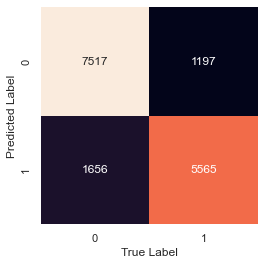

In [13]:
#Plot the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  # for plot styling
matrix = confusion_matrix(y_test, adopt_predict_with_threshold)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
plt.show()

In [14]:
# Calculate classifier's metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y_test, adopt_predict_with_threshold)
print(f"Accuracy Score: {accuracy} ")
precision = precision_score(y_test, adopt_predict_with_threshold, average="binary", zero_division=1)
print(f"Precision Score: {precision} ")
recall = recall_score(y_test, adopt_predict_with_threshold, average="binary")
print(f"Recall Score: {recall} ")
f1score = f1_score(y_test, adopt_predict_with_threshold, average="binary")
print(f"F1 Score: {f1score} ")

Accuracy Score: 0.8209601506118607 
Precision Score: 0.7706688824262568 
Recall Score: 0.8229813664596274 
F1 Score: 0.7959665307873848 


### C) Varia los valores del threshold in el rango de 0 a 1, y visualiza el valor de las metricas (accuracy, precision, recall, and F1-score) para ambas clases positivos y negativos  como funcion del threshold.

Explica tus resultados

In [15]:
accuracy_list = []
precision_list = []
recall_list = []
f1score_list = []

In [16]:
# Calculate classifier's metrics applying a threshold in range of 0 to 1
max_threshold = 10
for i in range(0,11):
    adopt_predict_threshold = (adopt_predict >= i/max_threshold).astype(int)
    
    accuracy = accuracy_score(y_test, adopt_predict_threshold)
    accuracy_list.append(accuracy)
    
    precision = precision_score(y_test, adopt_predict_threshold, average="binary", zero_division=1)
    precision_list.append(precision)
    
    recall = recall_score(y_test, adopt_predict_threshold, average="binary")
    recall_list.append(recall)
    
    f1score = f1_score(y_test, adopt_predict_threshold, average="binary")
    f1score_list.append(f1score)

Text(0.5, 0, 'Threshold')

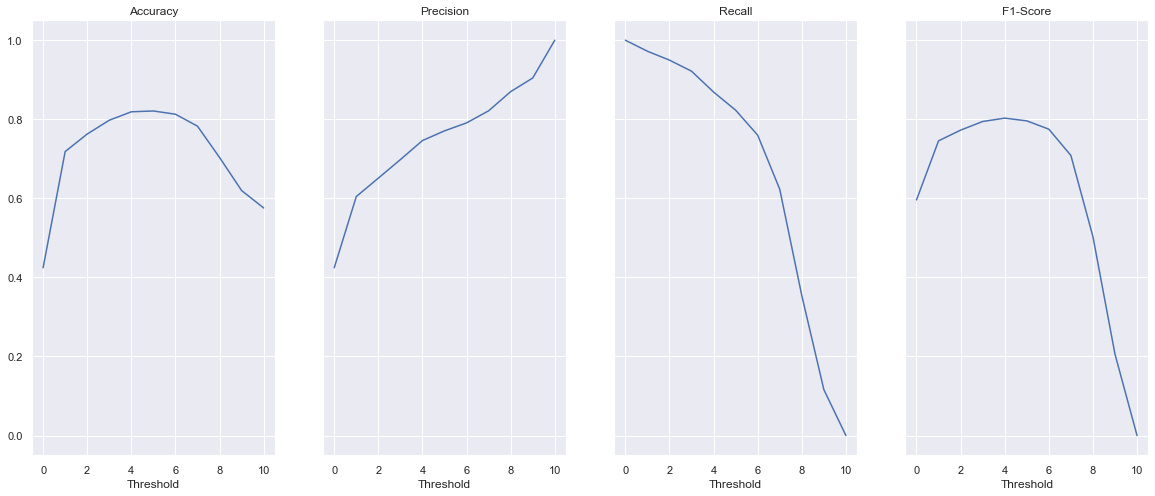

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(20,8), sharey=True)

# Plot metrics
plt.sca(axs[0])
plt.plot(accuracy_list)
plt.title("Accuracy")
plt.xlabel("Threshold")

plt.sca(axs[1])
plt.plot(precision_list)
plt.title("Precision")
plt.xlabel("Threshold")

plt.sca(axs[2])
plt.plot(recall_list)
plt.title("Recall")
plt.xlabel("Threshold")

plt.sca(axs[3])
plt.plot(f1score_list)
plt.title("F1-Score")
plt.xlabel("Threshold")

### D) Grafica en un bar chart los coeficientes del clasificador ordenados por su contribución a la predicción. 

Explica tus resultados 

In [18]:
#Get sorted classifier's coeficients
coef = logistic.coef_

coef_df = pd.DataFrame(coef[0], x_train.columns, columns=["Coef"])
coef_df.sort_values(by = ['Coef'], inplace=True, ascending=False)
coef_df

,Coef
animal_type_Bird,2.416293
sex_upon_outcome_Spayed Female,2.166379
sex_upon_outcome_Neutered Male,2.122892
intake_type_Owner Surrender,1.848991
age_upon_intake_(years),1.531342
sex_upon_intake_Intact Female,1.125552
sex_upon_intake_Intact Male,1.011873
intake_type_Stray,0.995188
intake_condition_Aged,0.826670
time_in_shelter_days,0.725847


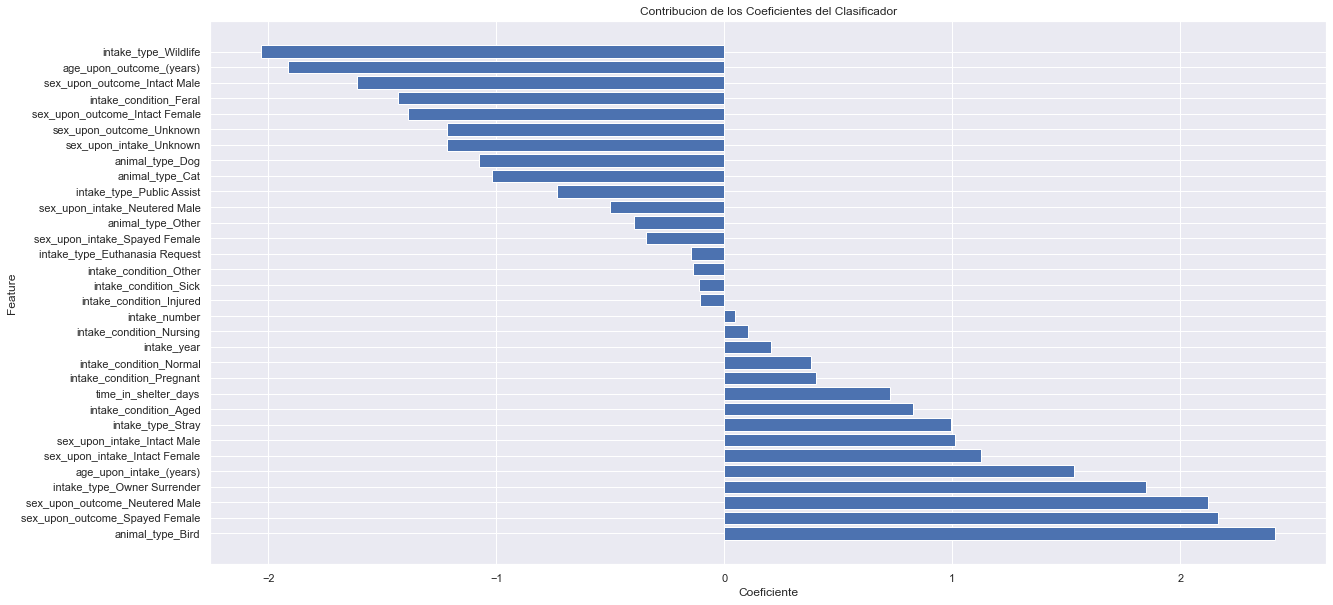

In [19]:
#Plot coeficients
plt.figure(figsize=(20,10))
plt.barh(coef_df.index, coef_df['Coef'])
plt.title('Contribucion de los Coeficientes del Clasificador')
plt.xlabel('Coeficiente')
plt.ylabel('Feature')
plt.show()

### E) Vuelve a entrenar un clasificador usando el mismo dataset que utilizaste en logistic regression, utiliza: 
1.  Support Vector Machines
1. Stochastic Gradient Descent
1. Nearest Neighbors
1. Naive Bayes
1. Una opcion dentro de ensemble methods (que no sea random forest)
1. MLP Classifier 

Link con la documentacion de scikit-learn: https://scikit-learn.org/stable/supervised_learning.html

Compara los resultados (tiempos de ejecucion y performance en base a precision, recall y f-1 score)

Explica tus conclusiones

In [20]:
import time
precision_list = []
recall_list = []
f1score_list = []
exec_list = []

In [21]:
def calculate_metrics(adopt_predict_probabilities):
    precision = precision_score(y_test, adopt_predict_probabilities, zero_division=1, average="binary")
    precision_list.append(precision)

    recall = recall_score(y_test, adopt_predict_probabilities, average="binary")
    recall_list.append(recall)

    f1score = f1_score(y_test, adopt_predict_probabilities, average="binary")
    f1score_list.append(f1score)

In [22]:
# Support Vector Machines
from sklearn import svm
svm = svm.SVC()

init_time = time.time()
svm.fit(X_Train_complete, y_train)
adopt_predict_svm = svm.predict(X_Test_complete)
final_time = time.time()

exec_list.append(final_time-init_time)
print(adopt_predict_svm)

[1 1 0 ... 1 0 1]


In [23]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=200, alpha=0.1)

init_time = time.time()
sgd.fit(X_Train_complete, y_train)
adopt_predict_sgd = sgd.predict(X_Test_complete)
final_time = time.time()

exec_list.append(final_time-init_time)
print(adopt_predict_sgd)

[0 1 0 ... 1 0 1]


In [24]:
# Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors=2
neigh_5 = KNeighborsClassifier(n_neighbors=5)

init_time = time.time()
neigh_5.fit(X_Train_complete, y_train)
adopt_predict_neigh_5 = neigh_5.predict(X_Test_complete)
final_time = time.time()

exec_list.append(final_time-init_time)

# n_neighbors=15
neigh_15 = KNeighborsClassifier(n_neighbors=15)

init_time = time.time()
neigh_15.fit(X_Train_complete, y_train)
adopt_predict_neigh_15 = neigh_15.predict(X_Test_complete)
final_time = time.time()

exec_list.append(final_time-init_time)
print(adopt_predict_neigh_15)

[1 1 0 ... 1 0 1]


In [25]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

init_time = time.time()
gnb.fit(X_Train_complete, y_train)
adopt_predict_gnb = gnb.predict(X_Test_complete)
final_time = time.time()

exec_list.append(final_time-init_time)
print(adopt_predict_gnb)

[1 1 0 ... 1 0 1]


In [26]:
# GradientBoostingClassifier(Ensemble methods)
from sklearn.ensemble import GradientBoostingClassifier
est = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

init_time = time.time()
est.fit(X_Train_complete, y_train)
adopt_predict_est = est.predict(X_Test_complete)
final_time = time.time()

exec_list.append(final_time-init_time)
print(adopt_predict_est)

[1 1 0 ... 1 0 1]


In [27]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

init_time = time.time()
mlp.fit(X_Train_complete, y_train)
adopt_predict_mlp = mlp.predict(X_Test_complete)
final_time = time.time()

exec_list.append(final_time-init_time)
print(adopt_predict_mlp)

[1 1 0 ... 1 0 1]


In [28]:
# Calculate metrics
calculate_metrics(adopt_predict_svm)
calculate_metrics(adopt_predict_sgd)
calculate_metrics(adopt_predict_neigh_5)
calculate_metrics(adopt_predict_neigh_15)
calculate_metrics(adopt_predict_gnb)
calculate_metrics(adopt_predict_est)
calculate_metrics(adopt_predict_mlp)

In [29]:
# Create a DataFrame of metrics
classifiers = ['Support Vector Machines', 'Stochastic Gradient Descent', 'Nearest Neighbors K=5', 'Nearest Neighbors K=15', 'Naive Bayes', 'Ensemble', 'MLP']
data = {'Precision': precision_list,'Recall': recall_list, 'F1-Score':f1score_list, 'Execution-Time': exec_list}

metrics_classifiers_df = pd.DataFrame(data, index=classifiers)
metrics_classifiers_df

,Precision,Recall,F1-Score,Execution-Time
Support Vector Machines,0.773527,0.852115,0.810921,207.551862
Stochastic Gradient Descent,0.790495,0.765010,0.777544,0.080998
Nearest Neighbors K=5,0.788145,0.821946,0.804691,16.276550
Nearest Neighbors K=15,0.786169,0.840580,0.812464,15.629575
Naive Bayes,0.637962,0.907128,0.749099,0.045021
Ensemble,0.788282,0.849601,0.817794,2.376033
MLP,0.778924,0.893079,0.832105,10.709520


Text(0.5, 1.0, 'Execution Time')

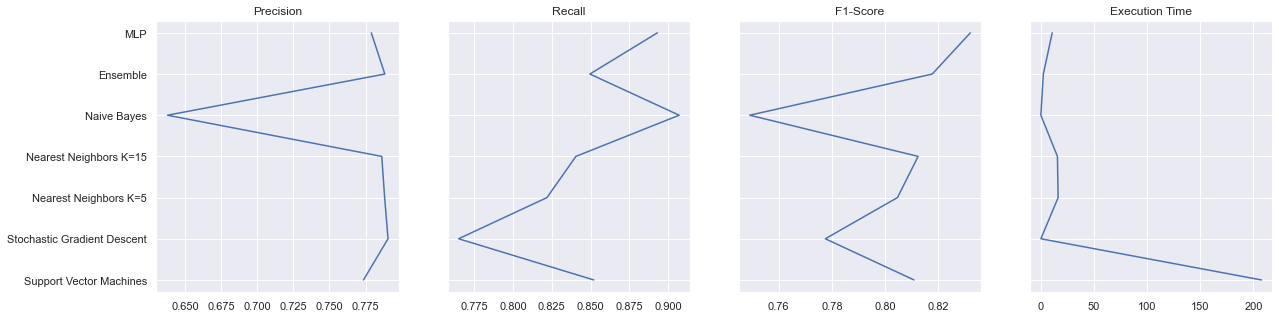

In [30]:
fig, axs = plt.subplots(1, 4, figsize=(20,5), sharey=True)

# Plot metrics
plt.sca(axs[0])
plt.plot(metrics_classifiers_df.Precision, classifiers)
plt.title("Precision")

plt.sca(axs[1])
plt.plot(metrics_classifiers_df.Recall, classifiers)
plt.title("Recall")

plt.sca(axs[2])
plt.plot(metrics_classifiers_df['F1-Score'], classifiers)
plt.title("F1-Score")

plt.sca(axs[3])
plt.plot(metrics_classifiers_df['Execution-Time'], classifiers)
plt.title("Execution Time")

# Quiz

## Questions 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95